# CS156 Final Project: Mandarin Chinese Text Classification

## 1. Problem Definition

In this final project, I aim to perform text classification on Mandarin Chinese news articles. Specifically, I will input raw news articles into the model, preprocess the model and then tag a label to the news. This is particularly hard for the Chinese text due to the difficulty in word separation (WS) in the tokenization phase. This is would also be a problem for further analysis, such as in sentiment analysis, but that is beyond the scope of the project. Simply, I will train and compare different models for classifying Mandarin Chinese text and then test the model by using it on unseen, unlabeled data to see the actual labeling in real life.

In the beginning, I will introduce the preprocessing necessary for normal Chinese text to be used as input our model and relevant datasets and packages. The following section will focus on the classification models. I will use three different models to compare and contrast their efficacy, namely, Convolutional Neural Networks (CNN), Long Short-Term Memory Networks (LSTM), and Bidirectional Encoder Representations from Transformers (BERT). I then focus on discussing the metrics of the models and using the three models on classifying unseen data, which can only be visually inspected due to the lack of labeling of this data. Lastly, I will evaluate the advantages and disadvantages of each model in Mandarin Chinese classification in the test and analysis section. I will also touch on the challenges from the preprocessing in Chinese text, overfitting, and future directions. 

## 2. Solution Specification

### Preprocessing

This section will introduce the tokenization in Mandarin Chinese and datasets/packages used in the Final Project. For Mandarin, lemmatization is not applicable due to the usage of Chinese characters that do not have any inflections according to grammatical changes. However, this also presents a challenge semantically as the exact same characters will have different functions in the sentence based on the exact position and context. 

#### Datasets and Packages

1. `Kashgari` package is used to help me easily manipulate different aspects of the natural language processing (NLP) pipeline, including tokenization, model building, and visualizations. This package helps us build different models without actually building them from scratch, expediting the process of text classification to only import data and fine-tuning the models (Kashgari, 2021).

2. `SMP2018ECDT` is the dataset used for training the models. Released by Evaluation of Chinese Human-Computer Dialogue Technology, SMP2018ECDT contains 31 labels and numerous text titles. This data is used to train the model due to the simplicity of the data.

3. `THUCNews` (THU Chinese News) is a database compiled by Tsinghua University in China. In this final project, I imported unseen text from this dataset into the three models in order to see how they will classify the text. Unfortunately, the labels do not match, so a quantitative analysis cannot be made.


### Tokenization

Due to the difference between alphabets and Chinese characters, tokenization in the two languages is very different. Without spaces for splitting words, tokenization in Mandarin Chinese resorts to dictionaries and pre-trained models that store the tokenization rules in Chinese. The following is some popular models for this.
1. **jieba**:

    Most widely used tokenizer in the Chinese language due to its simplicity and history. However, its performance is not the state-of-art anymore. `jieba` uses a dictionary and statistics to predict the separation of words. It has different modes for exact word separations or search engine word separations catering to different needs.
    
2. **CKIPtagger**:

    CKIPtagger is NLP package for Traditional Mandarin Chinese for the purpose of Word Separation (WS), Named Entity Recognition (NER), and Part of Speech (POS) tagging. According to the documentation of the package, it is said that the accuracy is higher than `jieba`. However, it is not widely used and tested.
    
In `Kashgari`, there exists a tokenizer for the BERT model but not for other models. Therefore we would need to tokenize the text using the aforementioned models. Fortunately, the `SMP2018ECDT` dataset is already tokenized in the `kashgari` module; hence I did not use these models for the training data. However, for the `THUCNews` dataset, I used `jieba` to tokenize the data in the classification section.

In [3]:
# Import pacakges
import kashgari
from kashgari.corpus import SMP2018ECDTCorpus
from kashgari.tasks.classification import BiGRU_Model
from kashgari.tasks.classification import BiLSTM_Model
from kashgari.tasks.classification import CNN_Model
from kashgari.embeddings import BertEmbedding
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
%%capture cap_out --no-stderr
# Import the SMP2018ECDT dataset in Kashgari
train_x, train_y = SMP2018ECDTCorpus.load_data('train')
valid_x, valid_y = SMP2018ECDTCorpus.load_data('valid')
test_x, test_y = SMP2018ECDTCorpus.load_data('test')
print("Example data: ", train_x[2])
print("Example label: ", train_y[2])

2021-04-22 12:38:28,403 [DEBUG] kashgari - loaded 1881 samples from /Users/enjuichang/.kashgari/datasets/SMP2018ECDTCorpus/train.csv. Sample:
x[0]: ['我', '想', '写', '一', '个', '新', '邮', '件']
y[0]: email
2021-04-22 12:38:28,413 [DEBUG] kashgari - loaded 418 samples from /Users/enjuichang/.kashgari/datasets/SMP2018ECDTCorpus/valid.csv. Sample:
x[0]: ['查', '看', '王', '老', '师', '的', '号', '码']
y[0]: contacts
2021-04-22 12:38:28,430 [DEBUG] kashgari - loaded 770 samples from /Users/enjuichang/.kashgari/datasets/SMP2018ECDTCorpus/test.csv. Sample:
x[0]: ['做', '可', '乐', '鸡', '翅', '需', '要', '哪', '些', '材', '料', '？']
y[0]: cookbook


### Model Training 

In this section, I will train three different models in order to perform text classification and compare the results. `Kashgari` package will be used for simplicity of the models, while I created a function called `plot_train_hist` to visualize the model's training process.

### Convolutional Neural Network (CNN)

Here I constructed a CNN model with `adam` optimizer and the `accuracy` as the metrics. The model consists of one embedding layer, one 1D convolutional layer, one global 1D max pooling, and two dense layers. The output has an activation function of 31 neurons for each label in the dataset.

CNNs can be used in text classification by introducing an embedding layer in the model. This layer converts the text into vectors so that the convolution layer can identify different patterns in the text vectors suitable for classification. To reduce overfitting, max pooling is used to make the patterns "hazy" by generalizing the patterns of a certain area, reducing the resolution of the convolution layer. In the end, we use the patterns found my the convolution layer and input that to a series of dense layers and activate the output based on the number of labels in the model (Choubey, 2021).

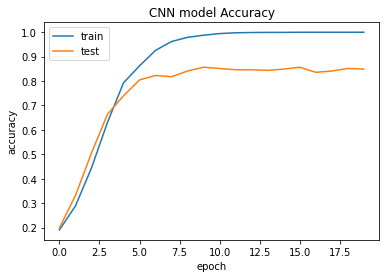

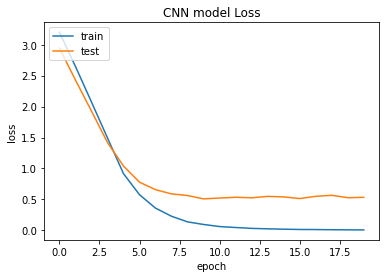

In [5]:
# Plot training history
plot_train_hist(CNN_history, "CNN model")

From the training history, we see that the model tends to overfit the training data, while the test accuracy hovers at 0.8.

### Bidirectional Long Short-Term Memory Network (BiLSTM)

Here I constructed a BiLSTM model with `adam` optimizer and the `accuracy` as the metrics. The model consists of one embedding layer, two bidirectional LSTM layers, three dense layers, and two dropout layers. The output has an activation function of 31 neurons for each label in the dataset.

BiLSTMs can be used in text classification by introducing an embedding layer in the model. This layer converts the text into vectors so that the following layers (bidirectional LSTM layers) can identify store memories in the text vectors suitable for classification. To reduce overfitting, two dropout layers are used to avoid dependencies on layers that overfit the training set. In the end, we use the memories/sequences obtained from the BiLSTMs and input that to a series of dense layers and activate the output based on the number of labels in the model.

BiLSTMs are a variant of LSTM, which is a Recurrent Neural Network (RNN). LSTM is capable of storing long-term memories when solving problems down the pipeline. Simply put, the LSTM layer consists of three parts at each cell (Olah, 2015):

1. **Decide what information we’re going to throw away from the cell state**: Based on the previous memories, decide what to remember for the previous cells.

2. **Decide what new information we’re going to store in the cell state**: Decide what to remember and forget in this cell and update the old cell accordingly.

3. **Decide what we’re going to output**: Based on the cell states, output a filtered version of the cell states using `tanh` function in the cell.

A bidirectional LSTM means that the LSTM is used forward and backward to fine-tune the actual output of the neural network. The major advantage of this model is that it can store past memories, which is especially useful for language models as past information is relevant to future words or classifications.

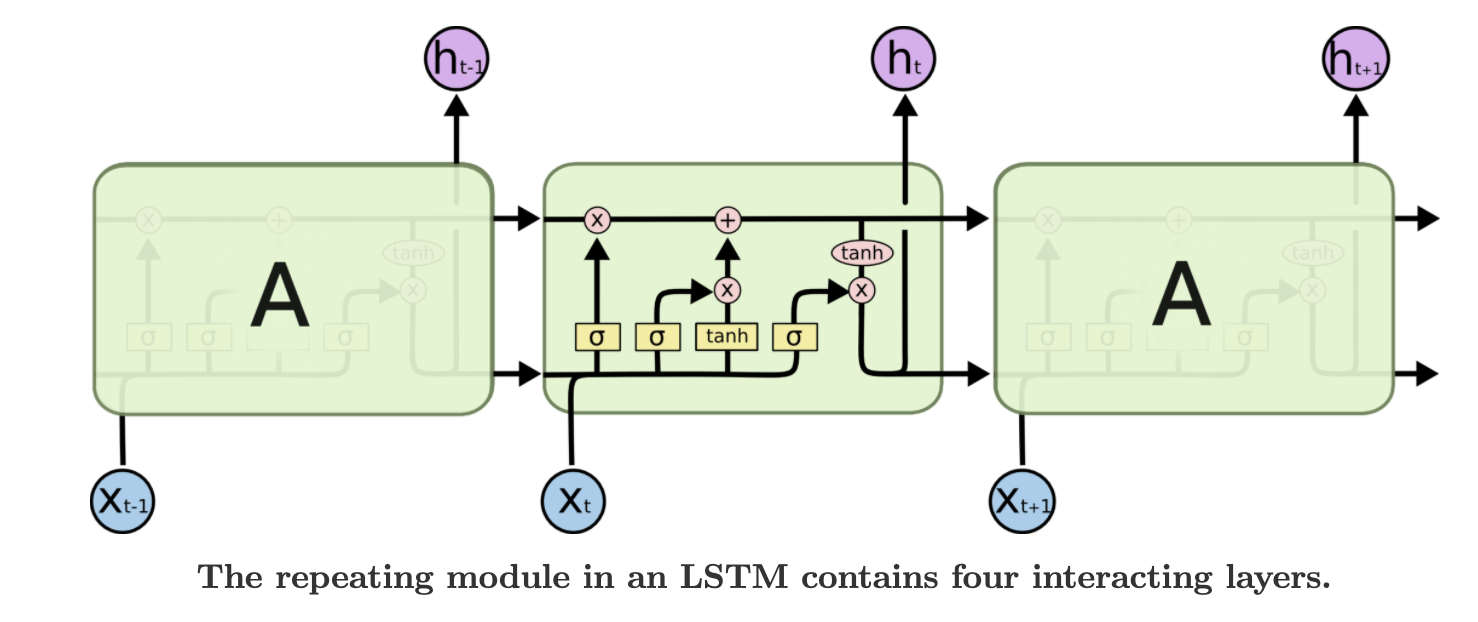

Basic layout of a LSTM model. Retrived from Olah (2015).

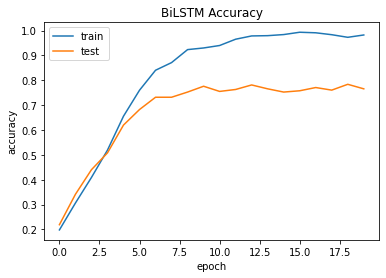

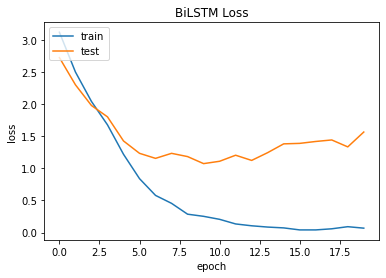

In [8]:
# Plot the training history
plot_train_hist(BiLSTM_history, "BiLSTM")

From the training history, we see that the model tends to overfit the training data, while the test accuracy hovers at 0.7.

###  Bidirectional Encoder Representations from Transformers model (BERT) 

Here I constructed a BERT model with `adam` optimizer and `accuracy` as the metrics. The model consists of the BERT pre-trained model downloaded online, one bidirectional LSTM layer, and one dense layer. The output has an activation function of 31 neurons for each label in the dataset.

BERT is constructed to perform tasks in NLP. Since the pre-trained model should be pretty general, I did not include dropout layers to reduce overfitting.

The BERT model uses Transfomers, which uses attention mechanism to identify contextual information in the text. Transformers have an encoder and decoder that reads the text and produce a prediction for the task, respectively. In the BERT model, some of the word sequences are replaced by a mask token; the model then tries to predict the original value based on the surrounding non-masked words. After that, the BERT model input the word sequence encoder and classify through classification layer and a softmax activation layer (Horev, 2018).

The attention mechanism is the core process for the transformer encoder to work. The idea behind this is to compute a weight distribution on the input sequence and assign higher values to more relevant elements in order to dynamically highlight the relevant features in a word sequence. By doing so, the encoder is able to perform directional-less memory and extract the most relevant feature at each word (Galassi et al., 2020).

The BERT model used in this project is pre-trained specifically for Mandarin Chinese and was loaded before the training. The training itself was only conducted on the bidirectional LSTM layer and the dense layer for classification -- the pre-trained BERT model was not fine-tuned and was frozen.

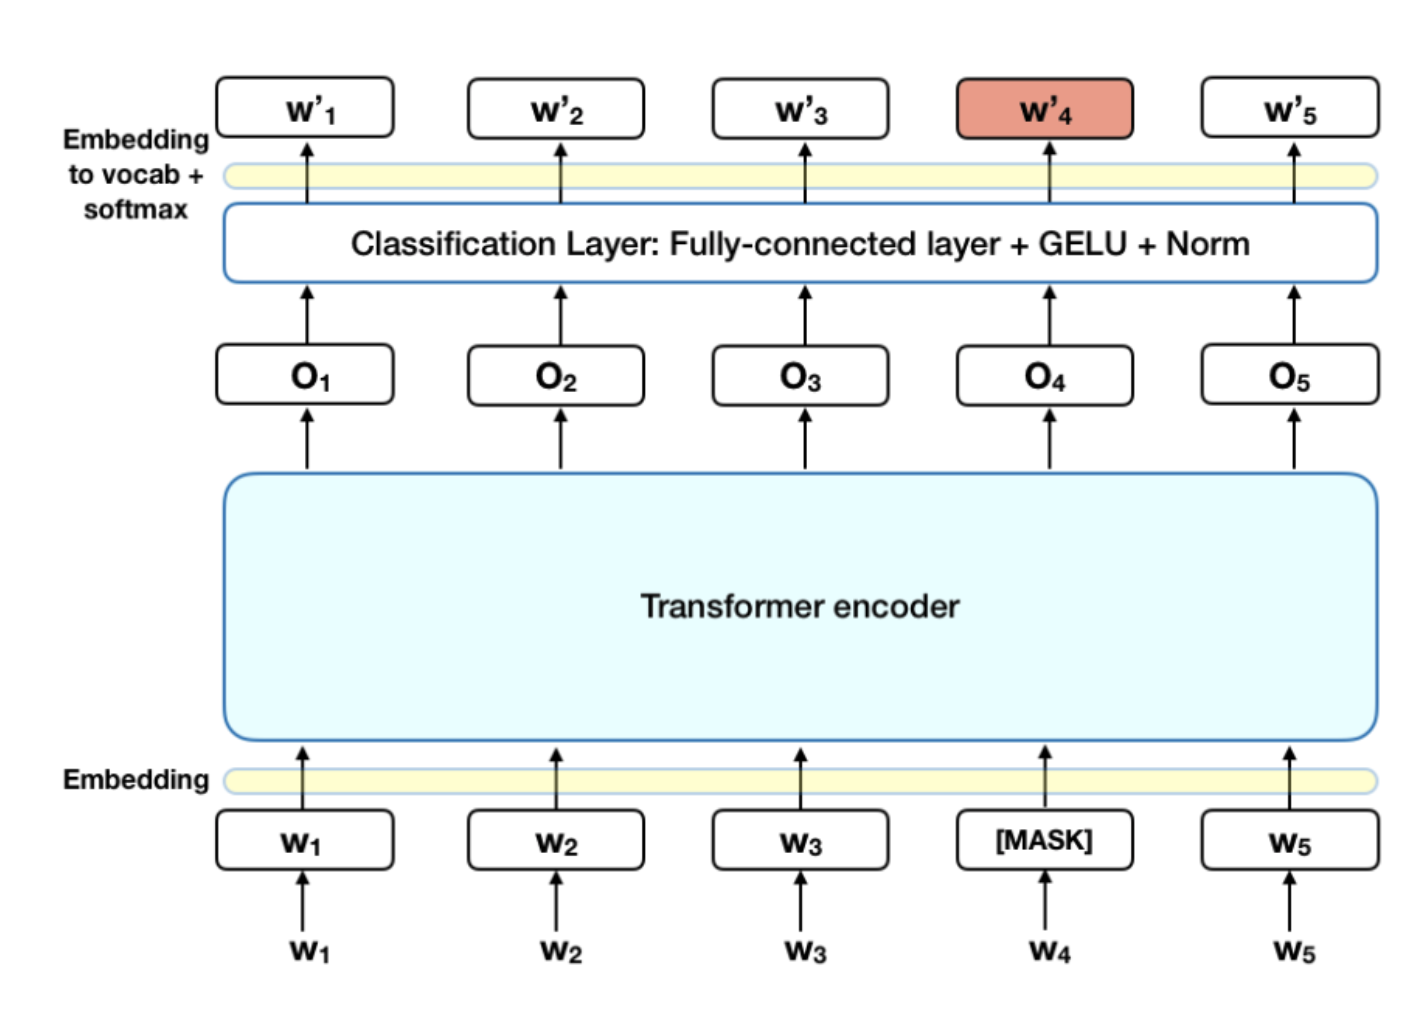

Schematic example of the BERT model. Retrieved from Horev (2018).

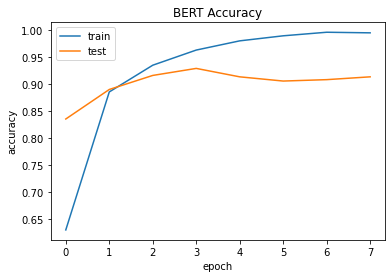

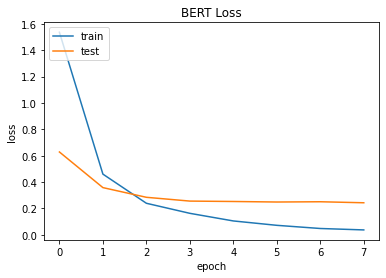

In [10]:
# Plot the training history
plot_train_hist(bert_model_history, "BERT")

## 3. Testing and Analysis

After training each model, I saved the trained models and loaded them here to analyze the results of the models when inputted with test data.

In [45]:
# Load saved model
CNN_loaded = CNN_Model.load_model('./CNN')
CNN_loaded.evaluate(test_x,test_y)
print(" ")

2021-04-22 03:07:34,163 [WARNING] kashgari - Sequence length is None, will use the max length of the samples, which is 67
2021-04-22 03:07:34,225 [DEBUG] kashgari - predict input shape (770, 67) x: 
[[  2   9 108 ...   0   0   0]
 [  2   9  26 ...   0   0   0]
 [  2 346  30 ...   0   0   0]
 ...
 [  2  22  22 ...   0   0   0]
 [  2   1   1 ...   0   0   0]
 [  2 143  18 ...   0   0   0]]
2021-04-22 03:07:34,752 [DEBUG] kashgari - predict output shape (770, 31)
2021-04-22 03:07:34,779 [DEBUG] kashgari - predict output argmax: [ 0 19 12  1  1 20  2 17  2  3  5  2  0  2  0 25 24  1  0  1 17  0  4 12
 12  5  0  9 21 18  0  0  0 20  0  0  0 17  0 15  0  0  5  0  0  3  6  1
 19  7  2 29  6 29  0  0  1 20 15  3  1 17 15  0 14  8 12  0  0 13 26  8
  1 14 13  0  1 24  1  8 15 28  8 15 15 15  0 12  2  3  0 26  1  1 23  0
 22  0  1  9 22  8 18  0 11  0  6  6 14  0 16  1  2  2  0 14 14  2  7  0
  0 17  1  0 29  4 29  1  5  2  0 23  5  2  6  0 11 12 14 18  1  0  0  0
  1 10 10  1 11  8  8 11  7  0 

              precision    recall  f1-score   support

         app     0.5909    0.7222    0.6500        18
         bus     1.0000    1.0000    1.0000         8
        calc     1.0000    0.7500    0.8571         8
        chat     0.9119    0.9416    0.9265       154
     cinemas     0.6250    0.6250    0.6250         8
    contacts     0.8333    1.0000    0.9091        10
    cookbook     0.9773    0.9663    0.9718        89
    datetime     0.5714    0.6667    0.6154         6
       email     1.0000    1.0000    1.0000         8
         epg     0.9259    0.6944    0.7937        36
      flight     1.0000    0.9524    0.9756        21
      health     0.7778    0.7368    0.7568        19
     lottery     0.8750    0.8750    0.8750         8
         map     0.8750    0.9130    0.8936        23
       match     1.0000    1.0000    1.0000         8
     message     1.0000    0.9524    0.9756        21
       music     0.9545    0.9545    0.9545        22
        news     0.8696    

In [ ]:
# Load saved model
BiLSTM_loaded = BiLSTM_Model.load_model('./BiLSTM')
BiLSTM_loaded.evaluate(test_x,test_y)

In [ ]:
# Load saved model
BERT_loaded = BiGRU_Model.load_model('./bert_model')
BERT_loaded.evaluate(test_x,test_y)

Here, we see that the BERT model has an over 0.9 accuracy in its f1 score as well as a higher accuracy in the recall and precision metrics. For the CNN and BiLSTM models, it seems that BiLSTM performs the worst, possibly due to overfitting, compared to the CNN model where the BiLSTM has a 0.7 f1 score, while the CNN model has a 0.8 f1 score.

On the other hand, in terms of the training time, the BERT model takes the longest time to train (over an hour), while the two other models finished training within 5 minutes. This indicates for training a BERT model with a large dataset, a stronger computational power is needed in order to finish training in a reasonable time. If the classification problem does not require very high accuracy, then possibly the CNN model could be of use when large datasets were encountered.

In addition, we see the impact of overfitting in the training history graphs in the previous sections. Although the training data often has an above 0.9 accuracy, when inputted on test data or validation data, the accuracy drops down to 0.7-0.8 for the BiLSTM and CNN model.

With an assumption of high computation power, the BERT model should be the optimal choice for text classification since the labeling is the most accurate. In the following section, I will test the three models with real news articles from the THUC dataset in order to observe the prediction of the labeling of the text.

### Classification on unlabeled data

I first loaded some random samples with the general category already shown in the dataset; however, this data is not labeled in the same way as the labels in `SMP2018ECDT`. Therefore, the resulting classification cannot be measured quantitatively.

In [44]:
# Import the unlabeled data
test_unlabeled_x = [storage[i][0] for i in range(len(storage))]
test_unlabeled_y = [storage[i][1] for i in range(len(storage))]
print("Actual classification: ", ['sports', 'entertain', 'land', 'education', 'tech']) 

Actual classification:  ['sports', 'entertain', 'land', 'education', 'tech']


In [45]:
# Run the classification and print the result
print("CNN model: ", CNN_Model.predict(test_unlabeled_x))
print("BiLSTM: ", BiLSTM_model.predict(test_unlabeled_x))
print("BERT: ", bert_model.predict(test_unlabeled_x))

2021-04-22 02:06:36,391 [DEBUG] kashgari - predict input shape (5, 680) x: 
[[2 1 1 ... 1 1 3]
 [2 1 1 ... 0 0 0]
 [2 1 1 ... 0 0 0]
 [2 1 1 ... 0 0 0]
 [2 1 1 ... 0 0 0]]
2021-04-22 02:06:36,485 [DEBUG] kashgari - predict output shape (5, 31)
2021-04-22 02:06:36,486 [DEBUG] kashgari - predict output argmax: [18 18  9 18 23]
2021-04-22 02:06:36,490 [DEBUG] kashgari - predict input shape (5, 680) x: 
[[2 1 1 ... 1 1 3]
 [2 1 1 ... 0 0 0]
 [2 1 1 ... 0 0 0]
 [2 1 1 ... 0 0 0]
 [2 1 1 ... 0 0 0]]


CNN model:  ['health', 'health', 'map', 'health', 'novel']


2021-04-22 02:06:36,834 [DEBUG] kashgari - predict output shape (5, 31)
2021-04-22 02:06:36,835 [DEBUG] kashgari - predict output argmax: [2 1 2 2 3]
2021-04-22 02:06:36,840 [DEBUG] kashgari - predict input shape (2, 5, 512) x: 
(array([[ 101,  100,  100, ..., 4638,  100, 1184],
       [ 101,  100, 2347, ...,    0,    0,    0],
       [ 101,  100, 8038, ..., 8024,  100,  100],
       [ 101, 8151,  100, ...,    0,    0,    0],
       [ 101,  100,  100, ...,  852,  100, 1400]], dtype=int32), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32))


BiLSTM:  ['video', 'cookbook', 'video', 'video', 'poetry']


2021-04-22 02:06:44,702 [DEBUG] kashgari - predict output shape (5, 31)
2021-04-22 02:06:44,703 [DEBUG] kashgari - predict output argmax: [4 5 5 5 4]


BERT:  ['epg', 'tvchannel', 'tvchannel', 'tvchannel', 'epg']


The outputs of classfication are the following:

0:app, 1:bus, 2:calc, 3:chat, 4:cinemas, 5:contacts, 6:cookbook, 7:datetime, 8:email, 9:epg, 10:flight, 11:health, 12:lottery, 13:map, 14:match, 15:message, 16:music, 17:news, 18:novel, 19:poetry, 20:radio, 21:riddle, 22:schedule, 23:stock, 24:telephone, 25:train, 26:translation, 27:tvchannel, 28:video, 29:weather, 30:website

It seems like the models do not perform in sync when using the models. This could mean that the training data is insufficient since `SMP2018ECDT` dataset only has short sentences. From this example, we see that the performance of the models in real life might not match the theoretical computation, illustrated by classification result from the unlabeled test data.

### Future Directions

1. **Tokenization**:

    Due to the writing system in Mandarin Chinese, start-ups and research have been trying to find a new approach to tackle the WS problem in Chinese. One interesting company, called Articut, uses linguistics principles rather than big data and machine learning to perform WS for Mandarin (https://github.com/Droidtown/ArticutAPI), which claims to have higher accuracy compared to `jieba` and `CKIPtagger` packages, demonstrating another approach in solving this problem.


2. **Models**:
   
   In order to receive an even better performance for the BERT model, it is necessary to fine-tune the model as well as increasing the data size to scale the model. This would require a higher computation power and a longer time to complete. For the other two models, I would expect the establishment of new layers or dropout layers to avoid overfitting and increase the accuracy.


## 4. Reference

Choubey, V. (2021). Text classification using CNN. Medium. Retrieved 21 April 2021, from https://medium.com/voice-tech-podcast/text-classification-using-cnn-9ade8155dfb9.

Droidtown. (2021). Droidtown/ArticutAPI. GitHub. Retrieved 21 April 2021, from https://github.com/Droidtown/ArticutAPI.

Galassi, A., Lippi, M., & Torroni, P. (2020). Attention in natural language processing. IEEE Transactions on Neural Networks and Learning Systems.

Horev, R. (2018). BERT Explained: State of the art language model for NLP. Medium. Retrieved 21 April 2021, from https://towardsdatascience.com/bert-explained-state-of-the-art-language-model-for-nlp-f8b21a9b6270.

jieba. (2021). fxsjy/jieba. GitHub. Retrieved 21 April 2021, from https://github.com/fxsjy/jieba.

Kashgari. (2021). Overview — Kashgari 2.0.1 documentation. Kashgari.readthedocs.io. Retrieved 21 April 2021, from https://kashgari.readthedocs.io/en/v2.0.1/.

Olah, C. (2015). Understanding LSTM Networks -- colah's blog. Colah.github.io. Retrieved 21 April 2021, from http://colah.github.io/posts/2015-08-Understanding-LSTMs/.

Ya, J. (2021). 中研院開源NLP套件「CKIPtagger」，繁中不結巴. Medium. Retrieved 21 April 2021, from https://br19920702.medium.com/%E4%B8%AD%E7%A0%94%E9%99%A2%E9%96%8B%E6%BA%90nlp%E5%A5%97%E4%BB%B6-ckiptagger-%E7%B9%81%E4%B8%AD%E4%B8%8D%E7%B5%90%E5%B7%B4-7822fc4efbf.

## 5. Appendices

### Appendix A. Code for `plot_train_hist` function.

In [3]:
def plot_train_hist(history, name):
    """
    This function plots the training history of the model.
    ---
    Input:
    history (object): history of the model according to fit() method.
    name (str): Name of the model
    
    Output:
    Two figures that show the history of the accuracy and history of the loss
    """
    # Summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{name} Accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
    # Summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{name} Loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

### Appendix B. Code for training the CNN model.

In [4]:
# CNN Model
CNN_Model = CNN_Model()

# Build the model using the training data
CNN_Model.build_model(train_x, train_y)

# Compile model with custom loss, optimizer and metrics
CNN_Model.compile_model(optimizer='adam', metrics = ['accuracy'])

# Train the model
CNN_history = CNN_Model.fit(train_x, train_y, valid_x, valid_y, epochs = 20)

# Evaluate the model
CNN_Model.evaluate(test_x, test_y)

# Save model
CNN_Model.save('CNN')

Preparing text vocab dict: 100%|██████████| 1881/1881 [00:00<00:00, 272690.65it/s]
2021-04-22 00:44:29,012 [DEBUG] kashgari - --- Build vocab dict finished, Total: 787 ---
2021-04-22 00:44:29,014 [DEBUG] kashgari - Top-10: ['[PAD]', '[UNK]', '[CLS]', '[SEP]', '的', '么', '我', '。', '怎', '你']
Calculating sequence length: 100%|██████████| 1881/1881 [00:00<00:00, 1275996.41it/s]
2021-04-22 00:44:29,044 [DEBUG] kashgari - Calculated sequence length = 15
2021-04-22 00:44:29,095 [DEBUG] kashgari - Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, None)]            0         
_________________________________________________________________
layer_embedding (Embedding)  (None, None, 100)         78700     
_________________________________________________________________
conv1d (Conv1D)              (None, None, 128)         64128     
___________________________

Epoch 1/20
29/29 [==============================] - 1s 31ms/step - loss: 3.3346 - accuracy: 0.1672 - val_loss: 2.9447 - val_accuracy: 0.1979
Epoch 2/20
29/29 [==============================] - 0s 9ms/step - loss: 2.7454 - accuracy: 0.2769 - val_loss: 2.4298 - val_accuracy: 0.3307
Epoch 3/20
29/29 [==============================] - 0s 9ms/step - loss: 2.1597 - accuracy: 0.4127 - val_loss: 1.9284 - val_accuracy: 0.5052
Epoch 4/20
29/29 [==============================] - 0s 7ms/step - loss: 1.6452 - accuracy: 0.5762 - val_loss: 1.4194 - val_accuracy: 0.6641
Epoch 5/20
29/29 [==============================] - 0s 8ms/step - loss: 1.0096 - accuracy: 0.7706 - val_loss: 1.0394 - val_accuracy: 0.7396
Epoch 6/20
29/29 [==============================] - 0s 7ms/step - loss: 0.6540 - accuracy: 0.8395 - val_loss: 0.7781 - val_accuracy: 0.8047
Epoch 7/20
29/29 [==============================] - 0s 7ms/step - loss: 0.4059 - accuracy: 0.9090 - val_loss: 0.6576 - val_accuracy: 0.8229
Epoch 8/20
29/29 [=

2021-04-22 00:44:34,799 [WARNING] kashgari - Sequence length is None, will use the max length of the samples, which is 67
2021-04-22 00:44:34,813 [DEBUG] kashgari - predict input shape (770, 67) x: 
[[  2  66  20 ...   0   0   0]
 [  2 297   1 ...   0   0   0]
 [  2 374 764 ...   0   0   0]
 ...
 [  2  73 116 ...   0   0   0]
 [  2  66   5 ...   0   0   0]
 [  2 375 169 ...   0   0   0]]
2021-04-22 00:44:35,006 [DEBUG] kashgari - predict output shape (770, 31)
2021-04-22 00:44:35,011 [DEBUG] kashgari - predict output argmax: [ 0  0  1  1  0 13  7 13 14  0  2 10 13  0 21  4  2 10 24  0  2 11 26 14
  0  0  1 18 11  0  0 13  0  1  0  2  2  8  0 20  9 13  2  0  0  2  2  2
  7  6 19  0  0  0  1  6 16 12 23 27 22  1  0  0  1 13  0  3  0  1  0  8
  1 16 11 18 17  0 12  0  1 15  6 13 14  0  0  2 28  0  1  2 12  7  0  2
  2 15  8 26  9  9  3  0  1 17  2  2 19  4  4 12  9 14  8  0 20 17  1  8
  0  2  1  0 27  0 13  9 11 12  5  3  1 25  1  1 11 12  1  5 18  0 20  0
  0  2 26 14  9 19  5  3  1  2 

              precision    recall  f1-score   support

         app     0.5909    0.7222    0.6500        18
         bus     1.0000    1.0000    1.0000         8
        calc     1.0000    0.7500    0.8571         8
        chat     0.9119    0.9416    0.9265       154
     cinemas     0.6250    0.6250    0.6250         8
    contacts     0.8333    1.0000    0.9091        10
    cookbook     0.9773    0.9663    0.9718        89
    datetime     0.5714    0.6667    0.6154         6
       email     1.0000    1.0000    1.0000         8
         epg     0.9259    0.6944    0.7937        36
      flight     1.0000    0.9524    0.9756        21
      health     0.7778    0.7368    0.7568        19
     lottery     0.8750    0.8750    0.8750         8
         map     0.8750    0.9130    0.8936        23
       match     1.0000    1.0000    1.0000         8
     message     1.0000    0.9524    0.9756        21
       music     0.9545    0.9545    0.9545        22
        news     0.8696    

'/Users/enjuichang/Desktop/Minerva/Spring 2020/CS156/Final/CNN'

### Appendix C. Code for building the BiLSTM model

In [48]:
from typing import Dict, Any
from tensorflow import keras
from kashgari.tasks.classification.abc_model import ABCClassificationModel
from kashgari.layers import L

# Create my own BiLSTM model based on the Kashgari package
class DoubleBiLSTMModel(ABCClassificationModel):
    """
    Bidirectional LSTM Sequence Labeling Model
    """

    @classmethod
    def default_hyper_parameters(cls) -> Dict[str, Dict[str, Any]]:
        """
        Get hyper parameters of model
        Returns:
            hyper parameters dict
        """
        return {
            'layer_blstm1': {
                'units': 128,
                'return_sequences': True
            },
            'layer_dropout1': {
                'rate': 0.2
            },
            'layer_blstm2': {
                'units': 128,
                'return_sequences': False
            },
            'layer_dropout2': {
                'rate': 0.2
            },
            'layer_dense': {
                'units': 64,
                'activation': 'relu'
            },
            'layer_time_distributed': {},
            'layer_output': {

            }
        }

    def build_model_arc(self):
        """
        build model architectural
        """
        output_dim = self.label_processor.vocab_size
        config = self.hyper_parameters
        embed_model = self.embedding.embed_model

        # Define your layers
        layer_blstm1 = L.Bidirectional(L.LSTM(**config['layer_blstm1']),
                                       name='layer_blstm1')
        layer_dropout1 = L.Dropout(**config['layer_dropout1'],
                                  name='layer_dropout1')
        layer_blstm2 = L.Bidirectional(L.LSTM(**config['layer_blstm2']),
                                       name='layer_blstm2')
        layer_dropout2 = L.Dropout(**config['layer_dropout2'],
                                  name='layer_dropout2')
        layer_dense = L.Dense(**config['layer_dense'],
                                  name='layer_dense')
        layer_time_distributed = L.Dense(output_dim, **config['layer_output'])

        # You need to use this actiovation layer as final activation
        # to suppor multi-label classification
        layer_activation = self._activation_layer()

        # Define tensor flow
        tensor = layer_blstm1(embed_model.output)
        tensor = layer_blstm2(tensor)
        tensor = layer_dropout2(tensor)
        tensor = layer_dense(tensor)
        tensor = layer_time_distributed(tensor)
        output_tensor = layer_activation(tensor)

        # Init model
        self.tf_model = keras.Model(embed_model.inputs, output_tensor)

### Appendix D. Code for training the BiLSTM model

In [ ]:
# BiLSTM model
BiLSTM_model = DoubleBiLSTMModel()

# Build the model using the training data
BiLSTM_model.build_model(train_x, train_y)

# Compile model with custom loss, optimizer and metrics
BiLSTM_model.compile_model(optimizer='adam', metrics = ['accuracy'])

# Train the model
BiLSTM_history = BiLSTM_model.fit(train_x, train_y, valid_x, valid_y, epochs= 20)

# Evaluate the model
BiLSTM_model.evaluate(test_x, test_y)

# Save model
BiLSTM_model.save('BiLSTM')

Preparing text vocab dict: 100%|██████████| 1881/1881 [00:00<00:00, 134364.59it/s]
2021-04-22 03:08:09,413 [DEBUG] kashgari - --- Build vocab dict finished, Total: 787 ---
2021-04-22 03:08:09,416 [DEBUG] kashgari - Top-10: ['[PAD]', '[UNK]', '[CLS]', '[SEP]', '的', '么', '我', '。', '怎', '你']
Calculating sequence length: 100%|██████████| 1881/1881 [00:00<00:00, 692850.25it/s]
2021-04-22 03:08:09,470 [DEBUG] kashgari - Calculated sequence length = 15
2021-04-22 03:08:15,229 [DEBUG] kashgari - Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, None)]            0         
_________________________________________________________________
layer_embedding (Embedding)  (None, None, 100)         78700     
_________________________________________________________________
layer_blstm1 (Bidirectional) (None, None, 256)         234496    
____________________________

Epoch 1/20
29/29 [==============================] - 30s 376ms/step - loss: 3.3050 - accuracy: 0.1762 - val_loss: 2.8111 - val_accuracy: 0.2031
Epoch 2/20
29/29 [==============================] - 4s 134ms/step - loss: 2.6699 - accuracy: 0.2114 - val_loss: 2.4250 - val_accuracy: 0.2526
Epoch 3/20
29/29 [==============================] - 3s 118ms/step - loss: 2.2036 - accuracy: 0.3165 - val_loss: 1.9683 - val_accuracy: 0.4271
Epoch 4/20
29/29 [==============================] - 3s 117ms/step - loss: 1.6444 - accuracy: 0.5271 - val_loss: 1.6235 - val_accuracy: 0.5469
Epoch 5/20
29/29 [==============================] - 4s 123ms/step - loss: 1.2512 - accuracy: 0.6300 - val_loss: 1.5449 - val_accuracy: 0.5911
Epoch 6/20
29/29 [==============================] - 3s 120ms/step - loss: 0.8187 - accuracy: 0.7593 - val_loss: 1.3687 - val_accuracy: 0.6510
Epoch 7/20
29/29 [==============================] - 6s 215ms/step - loss: 0.6438 - accuracy: 0.8147 - val_loss: 1.2667 - val_accuracy: 0.6849
Epoch

### Appendix E. Code for training the BERT model

In [9]:
# BERT Model
bert_embed = BertEmbedding('./BERT')
bert_model = BiGRU_Model(bert_embed, sequence_length=100)

# Build the model using the training data
bert_model.build_model(train_x, train_y)

# Compile model with custom loss, optimizer and metrics
bert_model.compile_model(optimizer='adam', metrics = ['accuracy'])

# Train the model
bert_model_history = bert_model.fit(train_x, train_y, valid_x, valid_y, epochs= 8)

# Save model
bert_model.save('bert_model')

2021-04-22 00:45:57,658 [DEBUG] kashgari - ------------------------------------------------
2021-04-22 00:45:57,659 [DEBUG] kashgari - Loaded transformer model's vocab
2021-04-22 00:45:57,660 [DEBUG] kashgari - config_path       : ./BERT/bert_config.json
2021-04-22 00:45:57,661 [DEBUG] kashgari - vocab_path      : ./BERT/vocab.txt
2021-04-22 00:45:57,662 [DEBUG] kashgari - checkpoint_path : ./BERT/bert_model.ckpt
2021-04-22 00:45:57,663 [DEBUG] kashgari - Top 50 words    : ['[PAD]', '[unused1]', '[unused2]', '[unused3]', '[unused4]', '[unused5]', '[unused6]', '[unused7]', '[unused8]', '[unused9]', '[unused10]', '[unused11]', '[unused12]', '[unused13]', '[unused14]', '[unused15]', '[unused16]', '[unused17]', '[unused18]', '[unused19]', '[unused20]', '[unused21]', '[unused22]', '[unused23]', '[unused24]', '[unused25]', '[unused26]', '[unused27]', '[unused28]', '[unused29]', '[unused30]', '[unused31]', '[unused32]', '[unused33]', '[unused34]', '[unused35]', '[unused36]', '[unused37]', '[u

Epoch 1/8
29/29 [==============================] - 475s 16s/step - loss: 2.1958 - accuracy: 0.4512 - val_loss: 0.6283 - val_accuracy: 0.8359
Epoch 2/8
29/29 [==============================] - 417s 15s/step - loss: 0.5559 - accuracy: 0.8640 - val_loss: 0.3582 - val_accuracy: 0.8906
Epoch 3/8
29/29 [==============================] - 413s 14s/step - loss: 0.2481 - accuracy: 0.9285 - val_loss: 0.2847 - val_accuracy: 0.9167
Epoch 4/8
29/29 [==============================] - 492s 17s/step - loss: 0.1762 - accuracy: 0.9611 - val_loss: 0.2560 - val_accuracy: 0.9297
Epoch 5/8
29/29 [==============================] - 492s 17s/step - loss: 0.1118 - accuracy: 0.9810 - val_loss: 0.2529 - val_accuracy: 0.9141
Epoch 6/8
29/29 [==============================] - 506s 18s/step - loss: 0.0884 - accuracy: 0.9868 - val_loss: 0.2489 - val_accuracy: 0.9062
Epoch 7/8
29/29 [==============================] - 491s 17s/step - loss: 0.0560 - accuracy: 0.9948 - val_loss: 0.2510 - val_accuracy: 0.9089
Epoch 8/8
29/

2021-04-22 01:53:38,169 [INFO] kashgari - model saved to /Users/enjuichang/Desktop/Minerva/Spring 2020/CS156/Final/bert_model


'/Users/enjuichang/Desktop/Minerva/Spring 2020/CS156/Final/bert_model'

### Appendix F. Code for generating the unlabeled news data

In [42]:
from glob import glob
import tqdm
import jieba
import numpy as np

# Set the file path
sports = glob('./News data/THUCNews/体育/*')
entertain = glob('./News data/THUCNews/娱乐/*')
land = glob('./News data/THUCNews/房产/*')
edu = glob('./News data/THUCNews/教育/*')
tech = glob('./News data/THUCNews/科技/*')

files = [sports, entertain, land, edu, tech]

storage = []

# Use preprocessing techniques to scrape and label the data
for label in range(len(files)):
    # Open the files
    text = files[label][np.random.randint(len(files[label]))]
    lines = open(text, 'r', encoding='utf-8').read().splitlines()
    
    # Run through lines and use jieba to perform word separation
    ls = []
    for line in tqdm.tqdm(lines):
        rows = line.split('\t')
        ls.append(list(jieba.cut('\t'.join(rows))))
        
    # Concatenate the WS-transformd data and label the news
    data = []
    ls = np.concatenate(np.asarray(ls))
    for i in range(len(ls)):
        if ls[i] != '\u3000' and ls[i] != '\xa0':
            data.append(ls[i])
    storage.append([data,label])

100%|██████████| 7/7 [00:00<00:00, 673.55it/s]
